# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that we can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**


- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# Install required packages with compatible versions of pandas
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 opencv-python==4.8.0.76 -q --user


In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal

import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Project_CNN/images.npy')

In [ ]:
# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Project_CNN/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.



## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.


### Plotting images using OpenCV and matplotlib

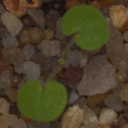

In [ ]:
cv2_imshow(images[5])

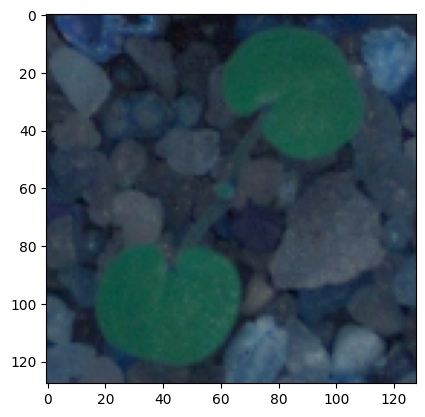

In [ ]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

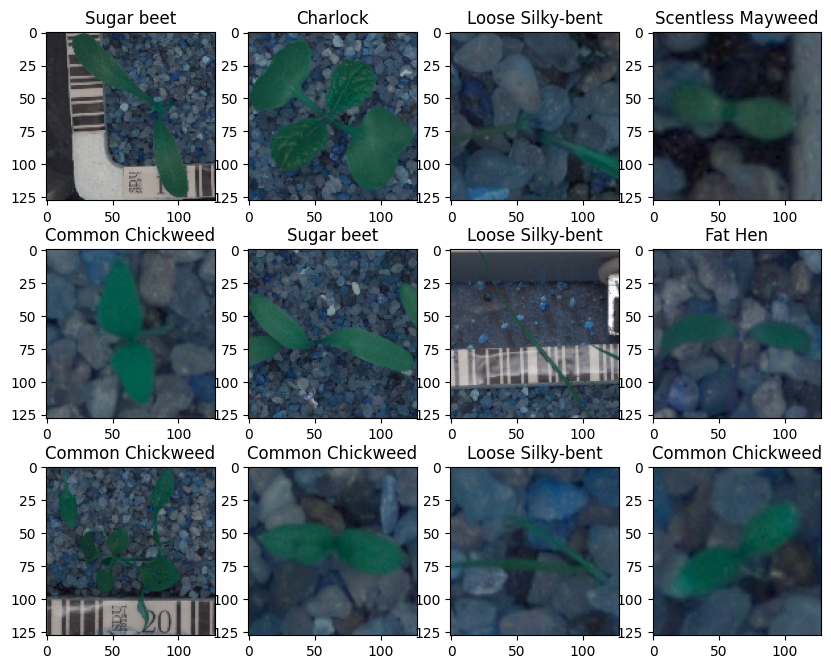

In [ ]:
plot_images(images,labels)

### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

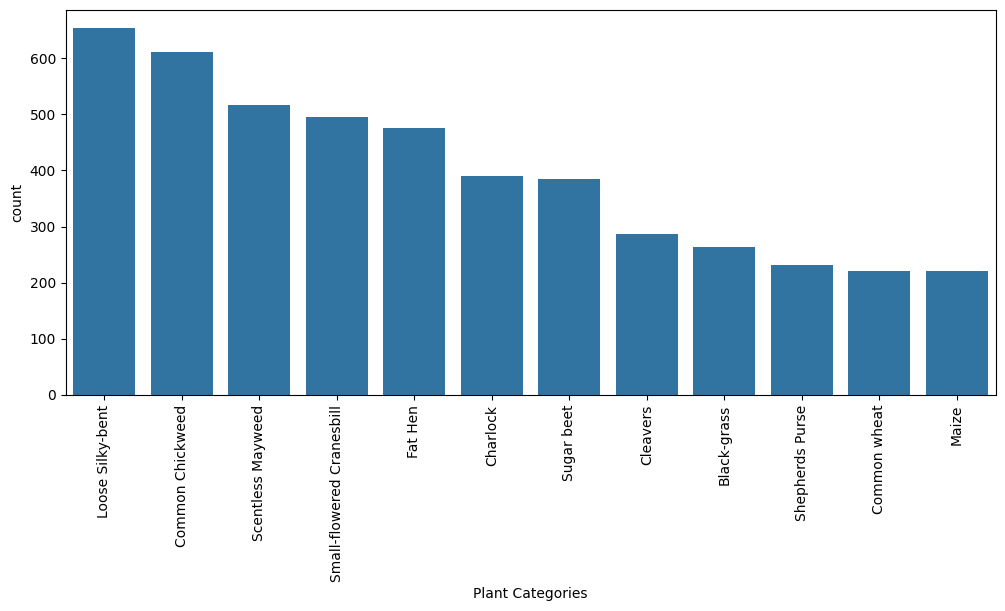

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=labels.iloc[:,-1],order = labels['Label'].value_counts().index)
plt.xlabel('Plant Categories')
plt.xticks(rotation=90)
#, palette='Greens_r'

Observation:
* As we can see from the above plot, the dataset is quite imbalanced.
* "Loose Silky bent" plant samples are more compared to other categories.
* Least plant samples are for "Common Wheat", "Maize".

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

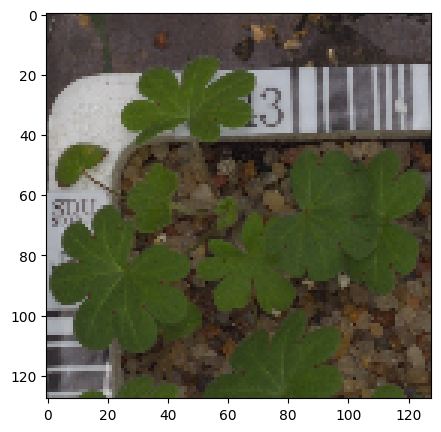

In [ ]:
plt.imshow(images[3])

**Image after resizing**

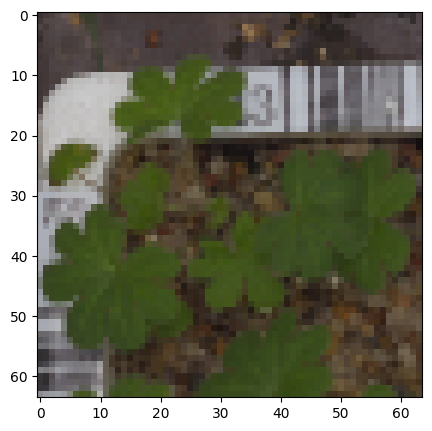

In [ ]:
plt.imshow(images_decreased[3])

#### Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))


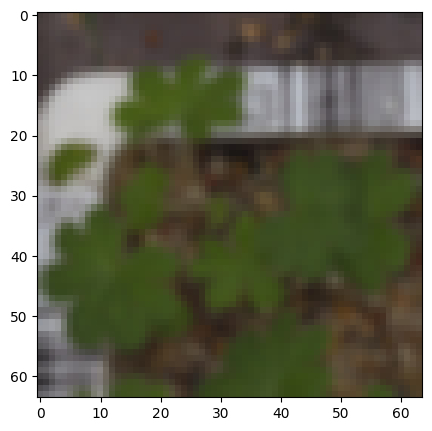

In [ ]:
plt.imshow(images_gb[3])

It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

### Data Preparation for Modeling

* As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
* We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
# Converting labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

Now, let's build a CNN Model with the following 2 main parts - <br>

1. The Feature Extraction layers which are comprised of convolutional and pooling layers.
2. The Fully Connected classification layers for prediction.<br><br>

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

**Fitting the model on the train data**

In [ ]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 7s - loss: 2.3955 - accuracy: 0.1700 - val_loss: 2.0902 - val_accuracy: 0.3271 - 7s/epoch - 60ms/step
Epoch 2/30
121/121 - 1s - loss: 1.8699 - accuracy: 0.3678 - val_loss: 1.5626 - val_accuracy: 0.4673 - 848ms/epoch - 7ms/step
Epoch 3/30
121/121 - 1s - loss: 1.5578 - accuracy: 0.4575 - val_loss: 1.3692 - val_accuracy: 0.5701 - 847ms/epoch - 7ms/step
Epoch 4/30
121/121 - 1s - loss: 1.3260 - accuracy: 0.5311 - val_loss: 1.1245 - val_accuracy: 0.6308 - 826ms/epoch - 7ms/step
Epoch 5/30
121/121 - 1s - loss: 1.1866 - accuracy: 0.5846 - val_loss: 1.0143 - val_accuracy: 0.6542 - 832ms/epoch - 7ms/step
Epoch 6/30
121/121 - 1s - loss: 1.0354 - accuracy: 0.6324 - val_loss: 1.0392 - val_accuracy: 0.6612 - 835ms/epoch - 7ms/step
Epoch 7/30
121/121 - 1s - loss: 0.9395 - accuracy: 0.6694 - val_loss: 0.9328 - val_accuracy: 0.6963 - 829ms/epoch - 7ms/step
Epoch 8/30
121/121 - 1s - loss: 0.8561 - accuracy: 0.6974 - val_loss: 0.9117 - val_accuracy: 0.7173 - 827ms/epoch - 7ms/step
Ep

**Model Evaluation**

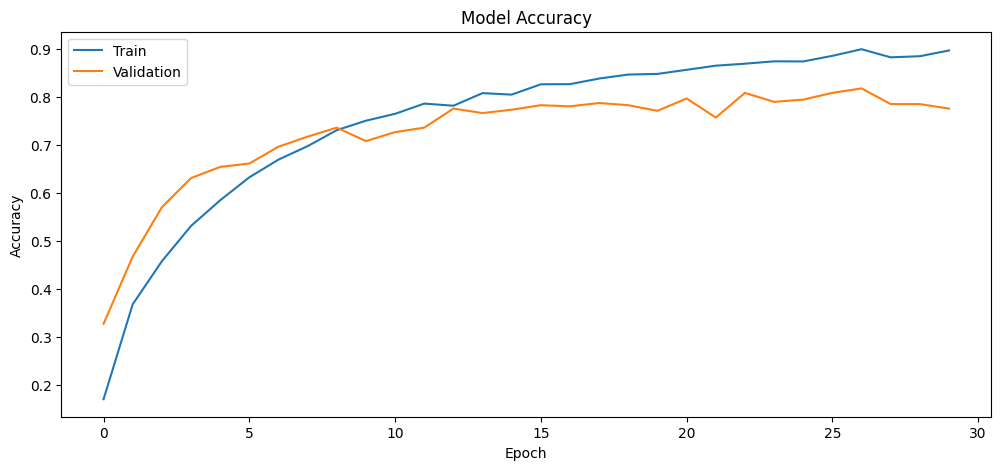

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9426 - accuracy: 0.7726 - 188ms/epoch - 13ms/step


In [ ]:
best_model_accuracy = history_1.history['accuracy'][np.argmin(history_1.history['loss'])] # Use history_1 consistently
best_model_accuracy

0.8994021415710449

**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


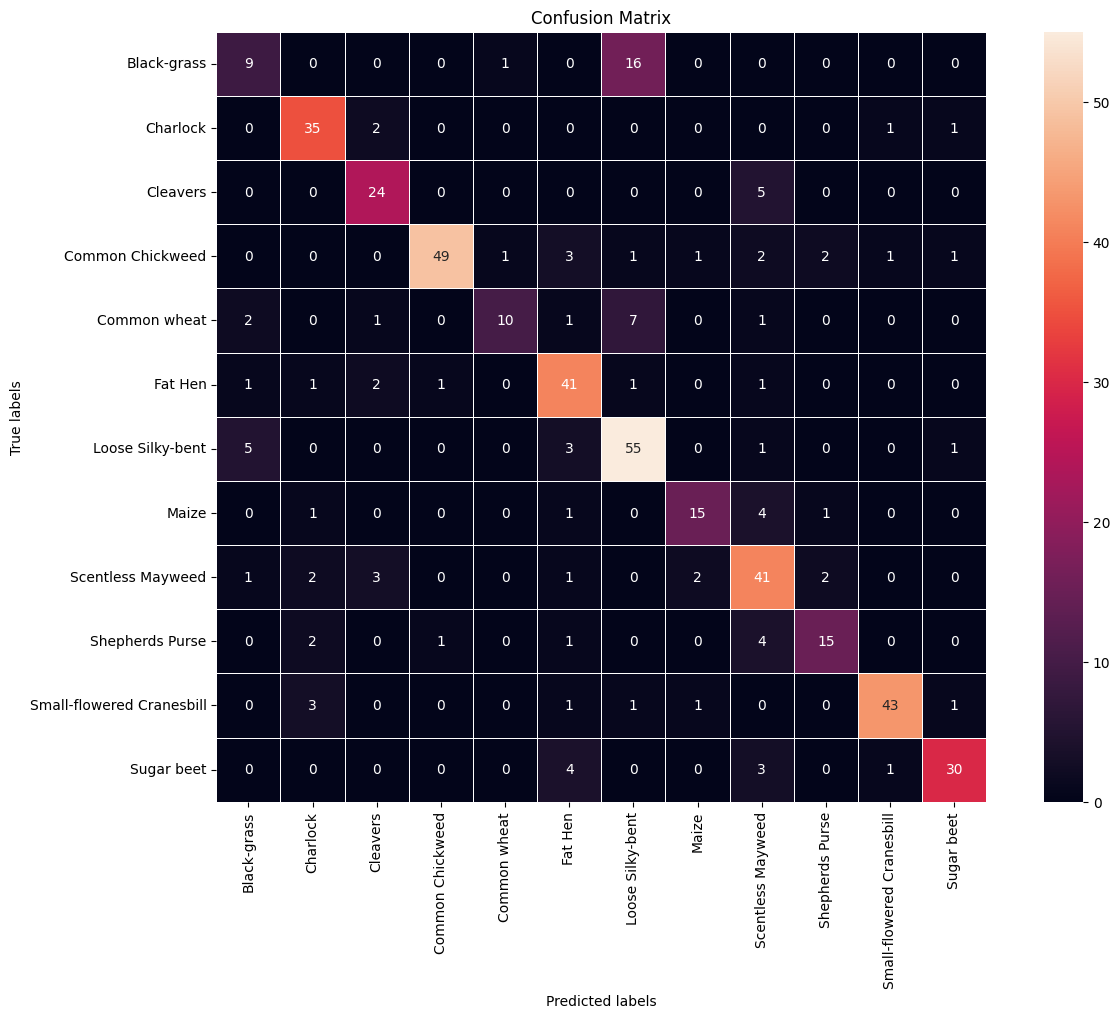

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()
plt.show()

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.80      0.90      0.84        39
           2       0.75      0.83      0.79        29
           3       0.96      0.80      0.88        61
           4       0.83      0.45      0.59        22
           5       0.73      0.85      0.79        48
           6       0.68      0.85      0.75        65
           7       0.79      0.68      0.73        22
           8       0.66      0.79      0.72        52
           9       0.75      0.65      0.70        23
          10       0.93      0.86      0.90        50
          11       0.88      0.79      0.83        38

    accuracy                           0.77       475
   macro avg       0.77      0.73      0.74       475
weighted avg       0.78      0.77      0.77       475



**Observations:**

* We observe that some of the classes are not predicted correctly.
* Training accuracy is 90% and test accuracy is 77% means the model is overfitting.
* We will use data augmentation to reduce overfitting.

## Model Performance Improvement

###  Model2



In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**Reducing the Learning Rate:**

Using ReduceLRonPlateau() function which will decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
#Using earlystopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,verbose=1)


**Data Augmentation:**

We are using the ImageDataGenerator() function which randomly changes the characteristics of images and provides randomness in the data. To avoid overfitting, we need a function. This function randomly changes the image characteristics.

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )


In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(128, (3, 3), activation='leaky_relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

model2.add(Conv2D(64, (3, 3), activation='leaky_relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

model2.add(Conv2D(32, (3, 3), activation='leaky_relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding two fully connected dense layer with 256 neurons
model2.add(Dense(256, activation='leaky_relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='leaky_relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(100, activation='leaky_relu',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                        

**As we saw the dataset is imbalanced, the below code can be used to treat the class imbalance by increasing the weights of the minority classes.**

In [ ]:
from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.7974709784411277,
 1: 0.8348524305555556,
 2: 1.714349376114082,
 3: 1.7909683426443204,
 4: 0.6476430976430977,
 5: 1.0145042194092826,
 6: 1.3818247126436782,
 7: 0.7669457735247209,
 8: 1.0275106837606838,
 9: 1.7909683426443204,
 10: 1.5050860719874803,
 11: 0.604874213836478}

**Fitting the model on the train data**

In [ ]:
# Epochs
epochs = 100
# Batch size
batch_size = 64

history2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    callbacks=[learning_rate_reduction,early_stopping],class_weight=class_weights)

Epoch 1/100
60/60 [==============================] - 7s 59ms/step - loss: 3.5815 - accuracy: 0.2350 - val_loss: 5.3662 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - 4s 69ms/step - loss: 2.3552 - accuracy: 0.3912 - val_loss: 8.3740 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 3/100
60/60 [==============================] - 4s 69ms/step - loss: 1.9573 - accuracy: 0.4732 - val_loss: 6.8098 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 4/100
60/60 [==============================] - ETA: 0s - loss: 1.7082 - accuracy: 0.5334
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 [==============================] - 4s 71ms/step - loss: 1.7082 - accuracy: 0.5334 - val_loss: 7.0711 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 5/100
60/60 [==============================] - 4s 68ms/step - loss: 1.5476 - accuracy: 0.5652 - val_loss: 5.9493 - val_accuracy: 0.1379 - lr: 5.0000e-04
Epoch 6/100
60/60 [==============================] - 4s 69ms/s

**Model Evaluation**

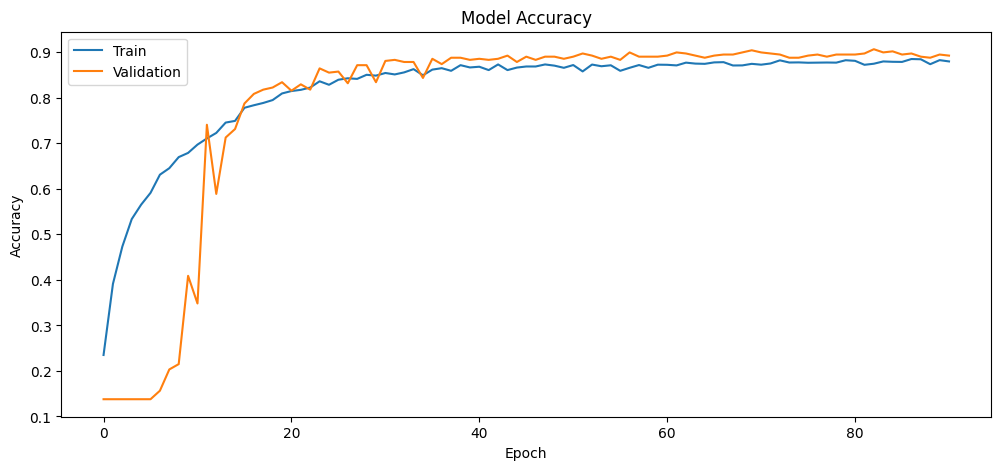

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5739 - accuracy: 0.8695 - 88ms/epoch - 6ms/step


**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


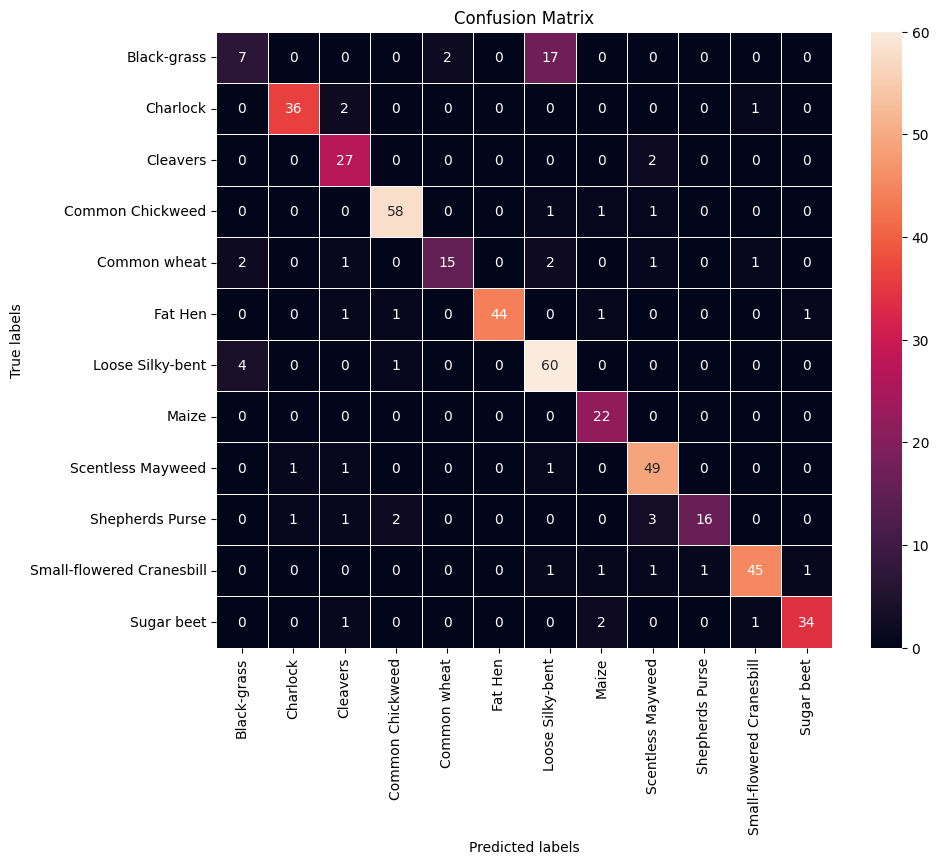

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()


**Plotting Classification Report**

In [ ]:

from sklearn.metrics import classification_report
#Printing the classification report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.54      0.27      0.36        26
           1       0.95      0.92      0.94        39
           2       0.79      0.93      0.86        29
           3       0.94      0.95      0.94        61
           4       0.88      0.68      0.77        22
           5       1.00      0.92      0.96        48
           6       0.73      0.92      0.82        65
           7       0.81      1.00      0.90        22
           8       0.86      0.94      0.90        52
           9       0.94      0.70      0.80        23
          10       0.94      0.90      0.92        50
          11       0.94      0.89      0.92        38

    accuracy                           0.87       475
   macro avg       0.86      0.84      0.84       475
weighted avg       0.87      0.87      0.86       475



**Observation:**
- The confusion matrix appears to be improving as well, however, there is still some confusion.
- The Loose Silky-bent is the most confusing class of all.
- We can observe that this model has better performance than our previous model.
- Training accuracy is 88% and test accuracy is 87%. The model is good at generalizing well. Let's try to improve the accuracy.
- Data augmentation, ReduceLRonPlateau() function, early-stopping, and class weight balance helped in improving the model performance.

###Model3

Let's try to improve the accuracy by adding a few more parameters in ImageDataGenerator for data augmentation parameters and adding more dense layers.

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,verbose=1)


In [ ]:
train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=20,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True,  # randomly flip images vertically
        fill_mode='nearest'
    )


In [ ]:
# Initialising the CNN classifier
model3 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))
#Adding Batch Normalization
model3.add(BatchNormalization())
# Add a Max Pooling layer of size 2X2
model3.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model3.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model3.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
model3.add(Flatten())

# Adding a fully connected layer with 512 neurons
model3.add(Dense(units = 512, activation = 'relu',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)))
model3.add(BatchNormalization())
# Adding dropout with probability 0.2
model3.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
model3.add(BatchNormalization())
model3.add(Dense(units = 128, activation = 'relu',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))


# The final output layer with 12 neurons to predict the categorical classifcation
model3.add(Dense(units = 12, activation = 'softmax'))


In [ ]:
# initiate Adam optimizer
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model3.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                        

**Fitting the model on the train data**

In [ ]:
# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss',patience=20, min_delta=0.0001, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

batch_size = 32
epochs = 50
# Fitting the model
history = model3.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=True),
                     epochs=epochs,
                     steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                     validation_data=(X_val_normalized, y_val_encoded),
                     callbacks=[early_stopping,learning_rate_reduction])


Epoch 1/50
120/120 [==============================] - 8s 40ms/step - loss: 3.1076 - accuracy: 0.4291 - val_loss: 7.2674 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/50
120/120 [==============================] - 5s 38ms/step - loss: 2.4142 - accuracy: 0.6286 - val_loss: 7.4652 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 3/50
120/120 [==============================] - 5s 38ms/step - loss: 2.0923 - accuracy: 0.6991 - val_loss: 8.3334 - val_accuracy: 0.1495 - lr: 0.0010
Epoch 4/50
120/120 [==============================] - 5s 38ms/step - loss: 1.9558 - accuracy: 0.7096 - val_loss: 7.2060 - val_accuracy: 0.0841 - lr: 0.0010
Epoch 5/50
120/120 [==============================] - 5s 38ms/step - loss: 1.7755 - accuracy: 0.7565 - val_loss: 3.3270 - val_accuracy: 0.4089 - lr: 0.0010
Epoch 6/50
120/120 [==============================] - 5s 39ms/step - loss: 1.6142 - accuracy: 0.7754 - val_loss: 2.0243 - val_accuracy: 0.6238 - lr: 0.0010
Epoch 7/50
120/120 [==============================] - 5s 38ms/st

**Evaluate the model on test data**

In [ ]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6878 - accuracy: 0.9095 - 60ms/epoch - 4ms/step


In [ ]:
best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
best_model_accuracy

0.9336828589439392

**Model Evaluation**

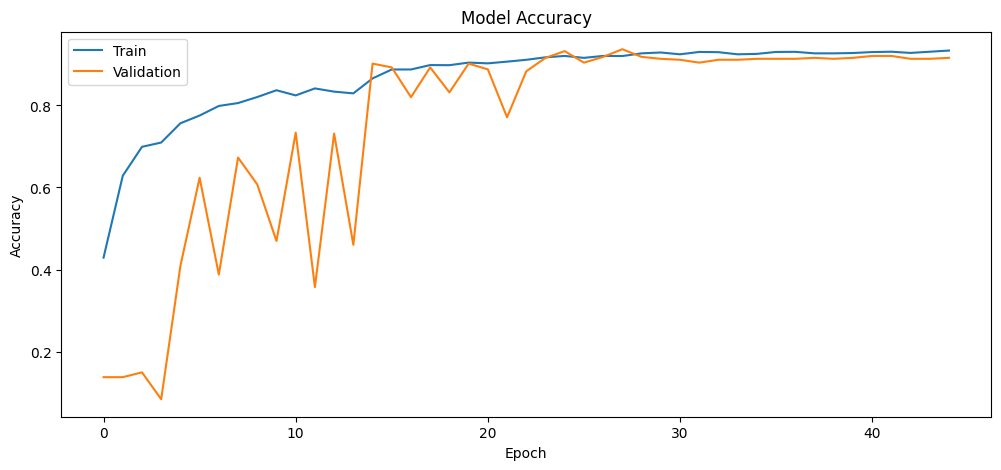

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


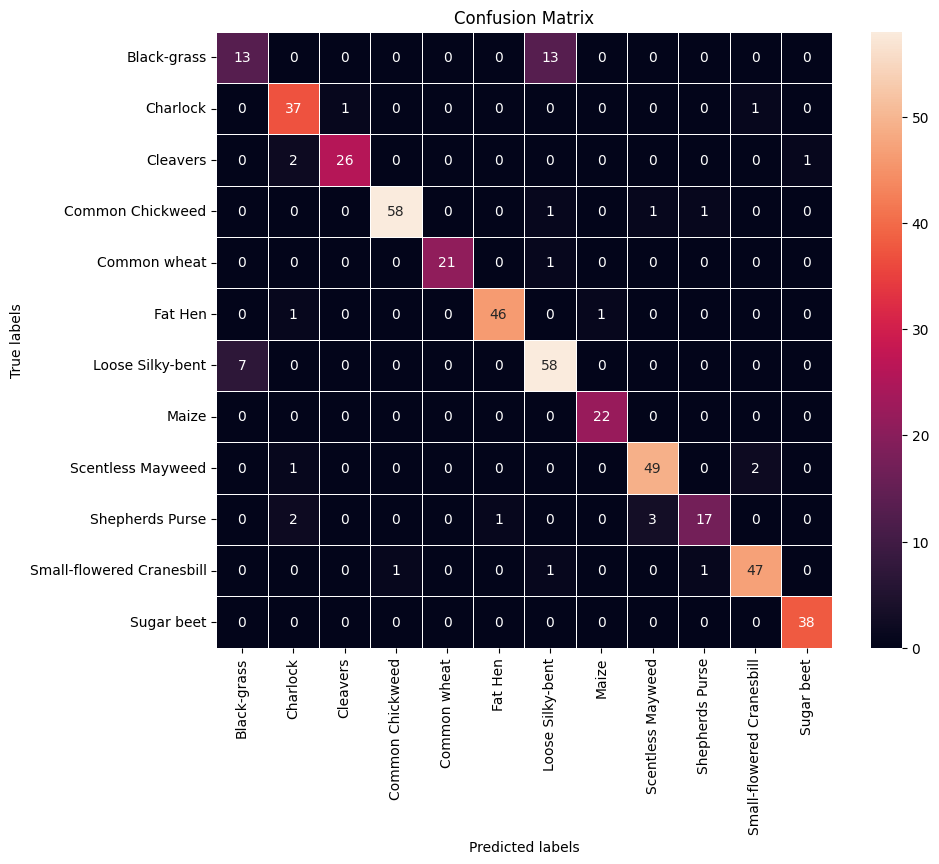

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()

**Plotting Classification Report**

In [ ]:

from sklearn.metrics import classification_report
#Printing the classification report
print(classification_report(y_test_arg,y_pred_arg, target_names=enc.classes_))

                           precision    recall  f1-score   support

              Black-grass       0.65      0.50      0.57        26
                 Charlock       0.86      0.95      0.90        39
                 Cleavers       0.96      0.90      0.93        29
         Common Chickweed       0.98      0.95      0.97        61
             Common wheat       1.00      0.95      0.98        22
                  Fat Hen       0.98      0.96      0.97        48
         Loose Silky-bent       0.78      0.89      0.83        65
                    Maize       0.96      1.00      0.98        22
        Scentless Mayweed       0.92      0.94      0.93        52
          Shepherds Purse       0.89      0.74      0.81        23
Small-flowered Cranesbill       0.94      0.94      0.94        50
               Sugar beet       0.97      1.00      0.99        38

                 accuracy                           0.91       475
                macro avg       0.91      0.89      0.90    

**Observations:**
-  Test Accuracy is 91% and Training accuracy
 is 93%.

-  The test data accuracy is comparable to the accuracy of the validation data.This implies that the model is giving a generalized performance.
- We note that the oscillations start reducing after epoch 20 and completely stabilize after epoch 30

- The model is majorly confused between Black grass and Loose Silky bent. This implies that the model might be focused on features related to shapes and sizes but not deep features of objects that can help to distinguish between plant seedlings.
- The highest precision is for Common wheat which implies that the model can distinguish Common wheat from other objects.
-  Model performed well in classifying Common Chickweed, Fat Hen, Sugar beet, Cleavers, and Maize.



**Let's see why the model is majorly confused between Black grass and Loose Silky-Bent. We will apply resize, gaussian blur, and masking on all images to remove the noise and to remove the background.**

In [ ]:
np_load_old = np.load

# # modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle = True, **k)

data = np.load('/content/drive/MyDrive/Project_CNN/images.npy')
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
preprocessed_data_color = []

for img in data:
  resize_img = cv2.resize(img,None,fx=0.50,fy=0.50)
  Gblur_img = cv2.GaussianBlur(resize_img,(3,3),0)
  hsv_img = cv2.cvtColor(Gblur_img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_green, upper_green)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_img, np.uint8)  # Create empty image
  clearImg[bMask] = resize_img[bMask]  # Apply boolean mask to the original image
  # clearImg1 = cv2.cvtColor(clearImg,cv2.COLOR_BGR2GRAY)

  preprocessed_data_color.append(clearImg)

#Preprocessed all plant images
preprocessed_data_color = np.asarray(preprocessed_data_color)

**Visualizing the preprocessed color plant images**

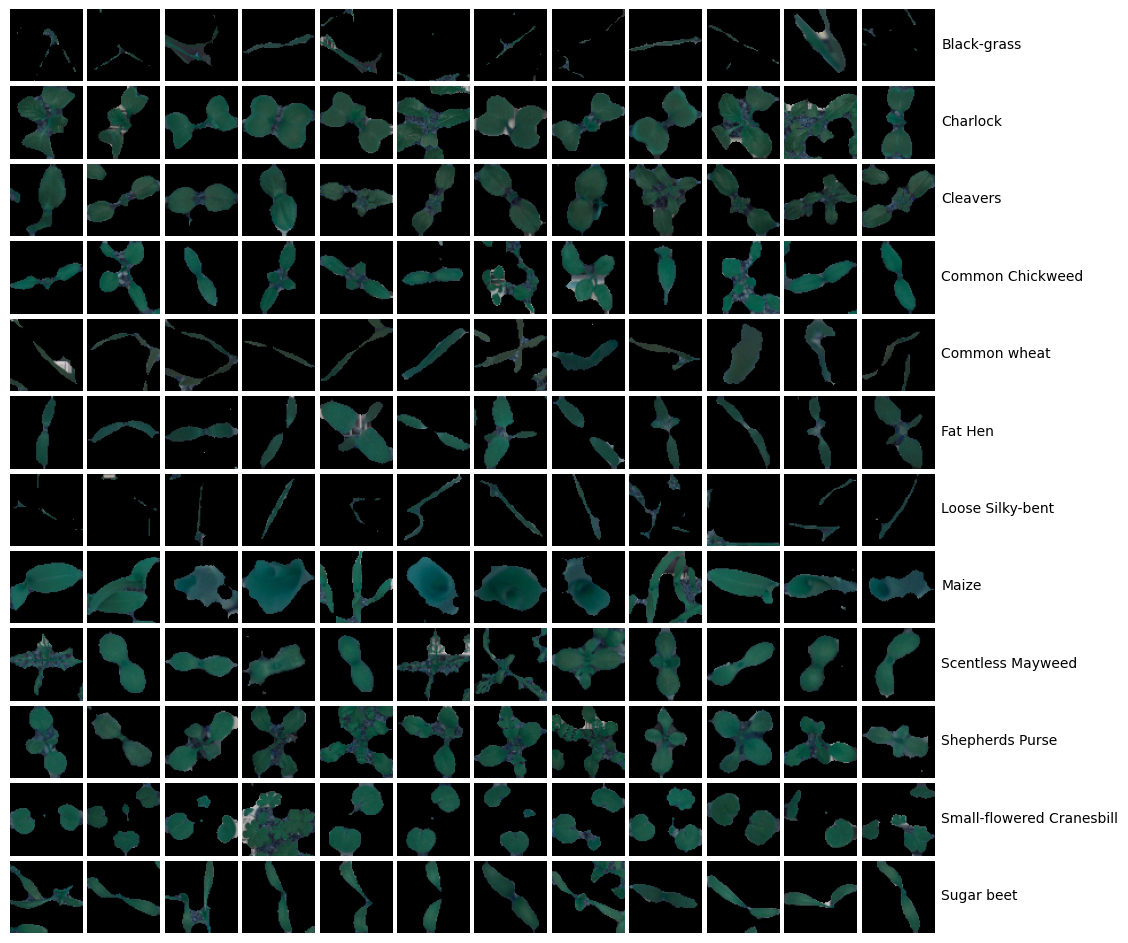

In [ ]:
categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categ)
ylabels = pd.read_csv('/content/drive/MyDrive/Project_CNN/Labels.csv')
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_color[plant_indices[j]]/255.)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

**Observations:**

* For both Black grass and Loose Silky bent the images provided occupy a very small portion of the image frame. The data here seems to be very limited in terms of critical identifiable differences leading to the poor quality of classification in our model.

### Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a fully connected layer with 512 neurons
new_model.add(Dense(units = 512, activation = 'relu',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)))
new_model.add(BatchNormalization())
# Adding dropout with probability 0.2
new_model.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
new_model.add(BatchNormalization())
new_model.add(Dense(units = 128, activation = 'relu',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.2))


# The final output layer with 12 neurons to predict the categorical classifcation
new_model.add(Dense(units = 12, activation = 'softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                     

**Fitting the model on the train data**

In [ ]:
# Epochs
epochs = 50
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/50
60/60 [==============================] - 7s 74ms/step - loss: 2.9408 - accuracy: 0.3685 - val_loss: 2.9912 - val_accuracy: 0.2944
Epoch 2/50
60/60 [==============================] - 4s 70ms/step - loss: 2.2597 - accuracy: 0.4962 - val_loss: 2.5595 - val_accuracy: 0.4206
Epoch 3/50
60/60 [==============================] - 4s 70ms/step - loss: 2.0083 - accuracy: 0.5535 - val_loss: 2.4557 - val_accuracy: 0.3972
Epoch 4/50
60/60 [==============================] - 4s 69ms/step - loss: 1.8056 - accuracy: 0.5945 - val_loss: 2.0515 - val_accuracy: 0.5304
Epoch 5/50
60/60 [==============================] - 4s 71ms/step - loss: 1.6841 - accuracy: 0.6336 - val_loss: 1.8430 - val_accuracy: 0.5818
Epoch 6/50
60/60 [==============================] - 4s 69ms/step - loss: 1.6059 - accuracy: 0.6497 - val_loss: 1.8706 - val_accuracy: 0.5794
Epoch 7/50
60/60 [==============================] - 4s 70ms/step - loss: 1.5272 - accuracy: 0.6664 - val_loss: 1.9218 - val_accuracy: 0.5164
Epoch 8/50
60

**Model Evaluation**

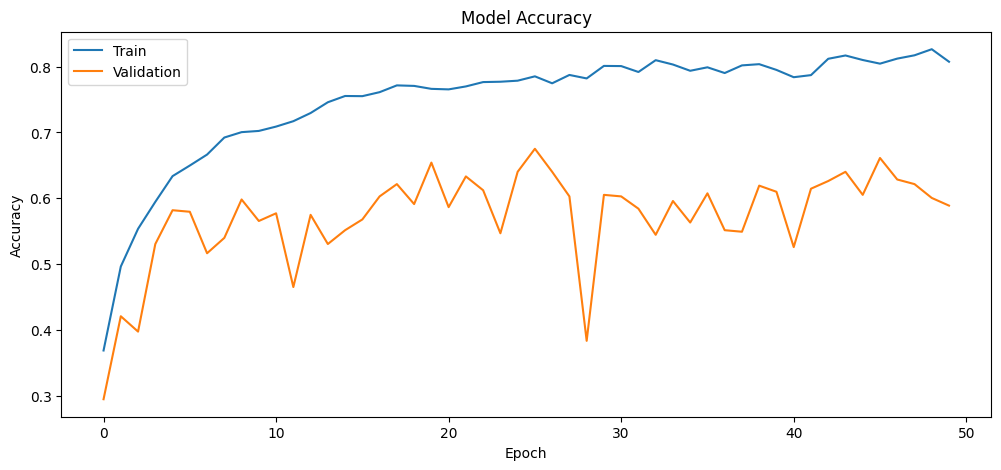

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

**Plotting the Confusion Matrix**

In [ ]:
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 1s 47ms/step


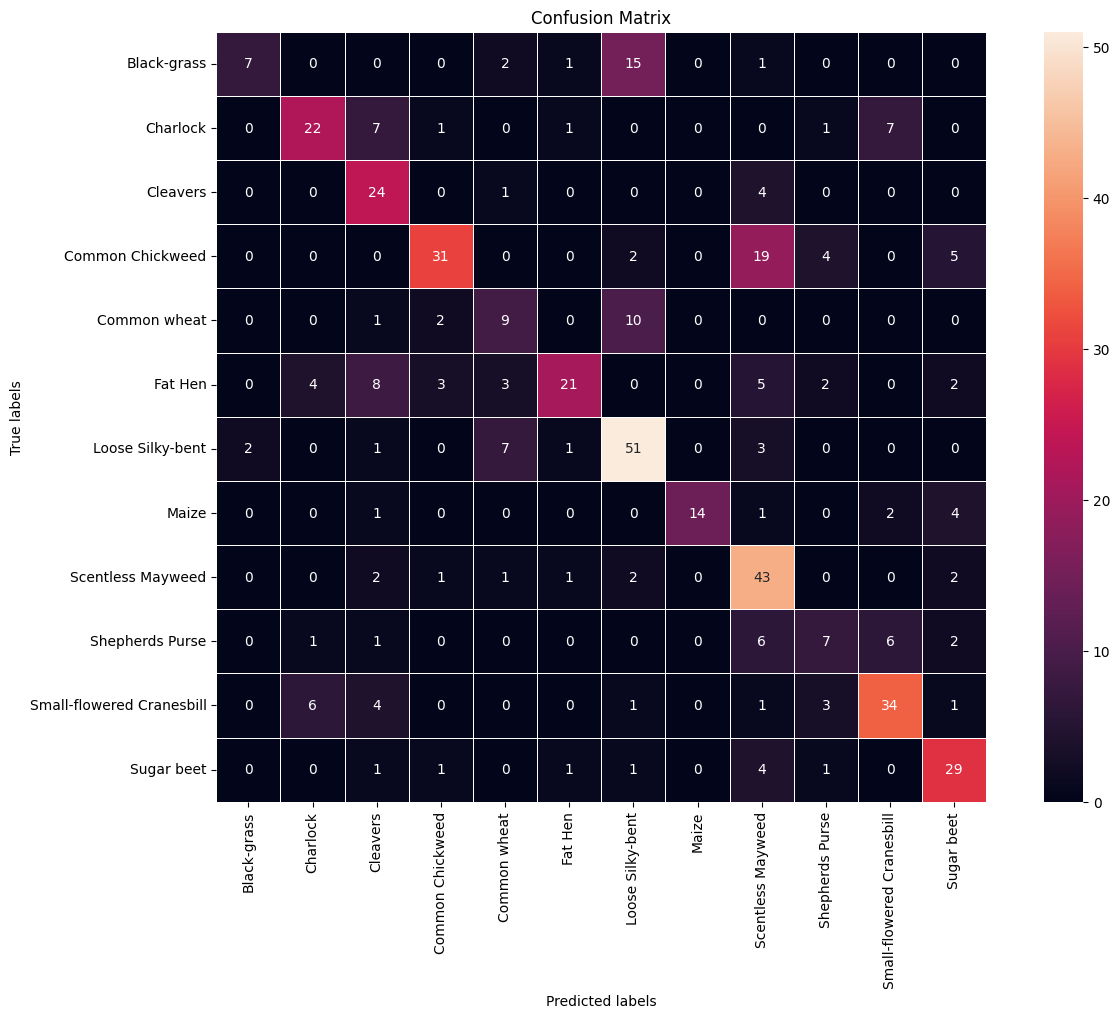

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()
plt.show()


**Plotting Classification Report**

In [ ]:
# Plotting the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.27      0.40        26
           1       0.67      0.56      0.61        39
           2       0.48      0.83      0.61        29
           3       0.79      0.51      0.62        61
           4       0.39      0.41      0.40        22
           5       0.81      0.44      0.57        48
           6       0.62      0.78      0.69        65
           7       1.00      0.64      0.78        22
           8       0.49      0.83      0.62        52
           9       0.39      0.30      0.34        23
          10       0.69      0.68      0.69        50
          11       0.64      0.76      0.70        38

    accuracy                           0.61       475
   macro avg       0.65      0.58      0.59       475
weighted avg       0.66      0.61      0.61       475



**Observation:**

* The model performance deteriorated using  VGG16 pre-trained architecture


## Final Model

* According to the confusion matrix and accuracy curve, the model3 has better performance than other models.
* Thus we can say that model3 is our best model and we can use this model to predict and visualize some test images.

### Visualizing the prediction

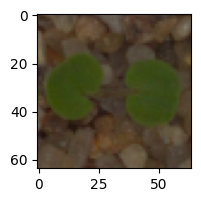

1/1 [==============================] - 0s 320ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


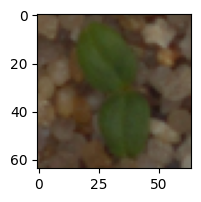

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Cleavers']
True Label Cleavers


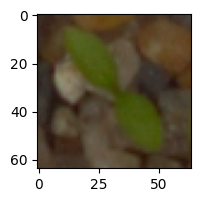

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


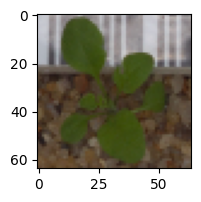

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()

print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()

print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()

print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()

print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations


**Conclusions:**
- We have built a CNN-model to predict the class of a plant, which works quite well
- We can observe from the confusion matrix of all the models that  Model 3  was the best model because it predicted the majority of the classes better than the others.
- The test accuracy of our model is 91%.
- Data Augmentation, Increasing number of epochs and adding layers has also helped in improving the performance.
- CNN with Batch Normalization, Maxpooling, dropouts along with dense layers is a good combination for image classification.
-  The model performance deteriorated using  VGG16 pre-trained architecture
that means using VGG16 architecture does not necessarily improve model performance.
- Model performed well in classifying Common wheat, Common Chickweed, Fat Hen, Sugar beet, Cleavers, and Maize.
-  The model is majorly confused between Black grass and Loose Silky bent.

**Scope of Improvement:**

- These models can be further improved by training with different filter sizes and different number of filters.
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.
- As per our analysis, For both Black grass and Loose Silky bent the images provided occupy a very small portion of the image frame. The data here seems to be very limited in terms of critical identifiable differences leading to the poor quality of classification in our model.



_____